In [1]:
import numpy as np
from numpy import sin,cos,pi
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Homework #1
## Example: plotting kinematic solutions

![double pendulum](../images/p1-10_double_pendulum.png)

### define kinematic known values

First, we can define the independent variable, `t`, to complete one full cycle. Then, we can use the inputs for $x,~\theta_1,~and~\theta_2$. 

In [2]:
t=np.linspace(0,2*pi/50,100); # create time varying from 0-0.126 s (or one period)
x=20*sin(50*t);     # define x in terms of time 
dx=20*50*cos(50*t); # define dx/dt in terms of time (note dx=dx/dt)
t1=0.2*pi*cos(50*t); # define theta1 (t1) 
dt1=-10*pi*sin(50*t); # define dtheta1/dt (dt1)
t2=0.2*pi*sin(50*t-pi/3); # define theta2 (t2) ;
dt2=10*pi*sin(50*t-pi/3); # define dtheta2/dt (dt2);
L1=1;L2=1.5; # set lengths for L1 and L2 (none were given in problem so 1 and 1.5 mm were
             # chosen arbitrarily

### define the other dependent kinematic values

In the lecture, you derived the positions of the link connections using the given values. Here, we apply those definitions to get the global positions of each link endpoint. 

In [3]:
rcc=np.array([x+L1*sin(t1),-L1*cos(t1)]) # position of connection between links
rco=np.array([x+L1*sin(t1)+L2*sin(t2),-(L1*cos(t1)+L2*cos(t2))])    # create a row vectors of
                                                                    # x-component and y-component of
                                                                    # pendulum position C (r_C/O) 
vco=np.array([dx+L1*cos(t1)*dt1+L2*cos(t2)*dt2,
     (L1*sin(t1)*dt1+L2*sin(t2)*dt2)]) # create row
                                       # vectors of
                                       # the x- and
                                       # y-component
                                       # velocity of
                                       # point C

### Plot results

Here, you plot the velocity components of the end of the lower link.

Text(0.5, 1.0, 'End velocity')

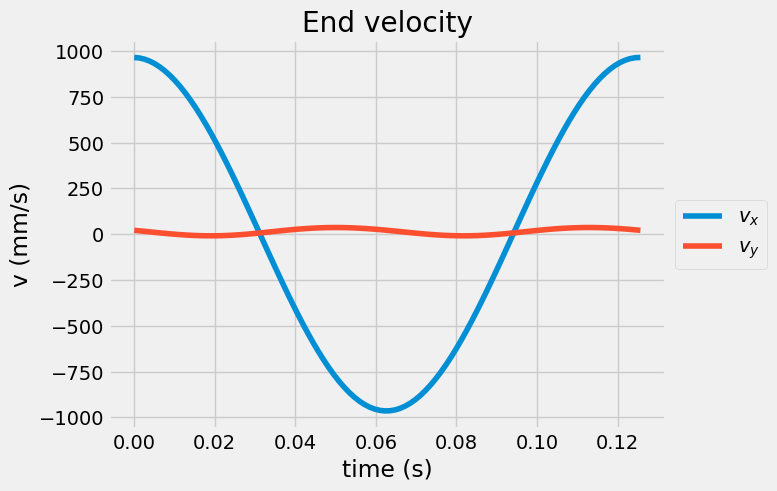

In [4]:
plt.plot(t,vco[0,:],label=r'$v_x$')
plt.plot(t,vco[1,:],label=r'$v_y$')
plt.xlabel('time (s)')
plt.ylabel('v (mm/s)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('End velocity')

### Animate the motion

Here, you create an HTML animation for the 2-bar linkage

1. Create function that plots the links at timesteps

2. [matplotlib's animation in HTML5](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/)

In [5]:
from matplotlib import animation
from IPython.display import HTML

1. Create a figure to display the animation and add fixed background _the dashed line is added to show the path the end point takes_

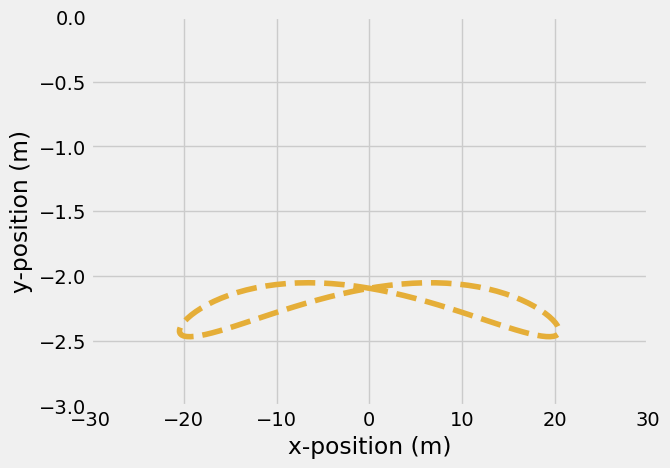

In [6]:
fig, ax = plt.subplots()

ax.set_xlim(( -30, 30))
ax.set_ylim((-3, 0))
ax.set_xlabel('x-position (m)')
ax.set_ylabel('y-position (m)')

line, = ax.plot([], [])
marker, = ax.plot([], [], 'o', markersize=10)
ax.plot(rco[0,:],rco[1,:],'--')

2. Create an initializing (`init`) function that clears the previous line and marker

In [7]:
def init():
    line.set_data([], [])
    marker.set_data([], [])
    return (line,marker,)

3. Create an animating (`animate`) function that updates the line

In [8]:
def animate(i):
    '''function that updates the line and marker data
    arguments:
    ----------
    i: index of timestep
    outputs:
    --------
    line: the line object plotted in the above ax.plot(...)
    marker: the marker for the end of the 2-bar linkage plotted above with ax.plot('...','o')'''
    line.set_data([x[i],rcc[0,i],rco[0,i]],[0,rcc[1,i],rco[1,i]])
    marker.set_data([rco[0, i], rco[1,i]])
    return (line, marker, )

In [9]:
rco

array([[ -0.18873824,   1.10586301,   2.39640964,   3.67777691,
          4.94486075,   6.19259618,   7.41597623,   8.61007129,
          9.77004878,  10.89119334,  11.96892719,  12.99883066,
         13.97666282,  14.89838189,  15.76016533,  16.55842937,
         17.28984772,  17.95136922,  18.54023419,  19.05398925,
         19.49050039,  19.84796405,  20.12491615,  20.32023893,
         20.43316542,  20.46328179,  20.41052727,  20.27519205,
         20.05791304,  19.75966774,  19.38176643,  18.92584277,
         18.3938431 ,  17.78801457,  17.11089242,  16.36528638,
         15.55426658,  14.68114889,  13.74948008,  12.76302256,
         11.72573906,  10.64177715,   9.51545367,   8.35123909,
          7.15374177,   5.92769216,   4.67792687,   3.4093726 ,
          2.12702989,   0.83595664,  -0.4587486 ,  -1.75196372,
         -3.0385604 ,  -4.31342196,  -5.57146153,  -6.80764077,
         -8.01698893,  -9.19462242, -10.33576475, -11.43576678,
        -12.49012721, -13.49451317, -14.

4. Create an animation (`anim`) variable using the `animation.FuncAnimation`

In [10]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,len(t)), interval=100, 
                               blit=True)

In [11]:
range(0,len(t))

range(0, 100)

In [12]:
HTML(anim.to_html5_video())

## Problem 1

![Pendulum on train](../images/Wells-Fig_1-5.png)

The axis shown in Fig 1-5 has the following constants

$v_x=1$ m/s. 

$m= 1$ kg

$r= 500$ mm

$l_2 = 1000$ mm

$l_1 = 1200$ mm

$s_2 = 10$ mm

$v_y = 0$ m/s

$a_x = 0$ m/s$^2$

**(a)** Plot the angle of the pendulum for one full period of oscillation given $\theta(0)=\pi/12$ and $\dot{\theta}(0)=0$

Text(0.5, 1.0, 'Motion of theta')

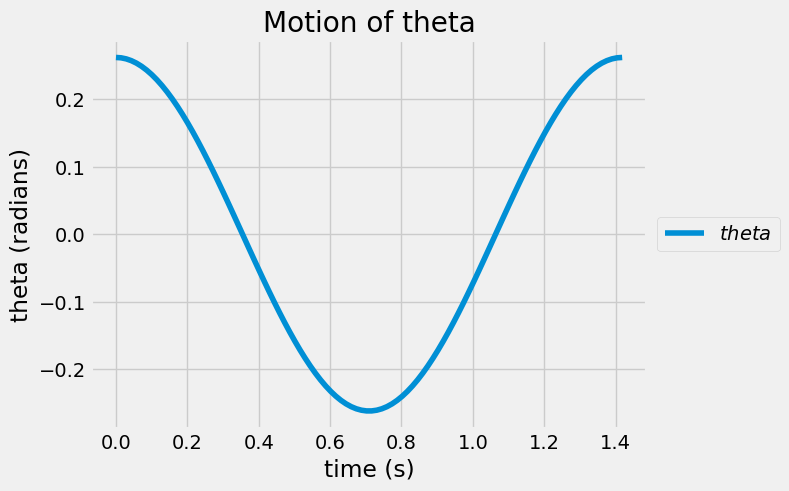

In [13]:
 # insert code here
    
# sin(theta)  ~ theta

r = .5
g = 9.81

naturalFreq = np.sqrt(g/r)
t=np.linspace(0,2*pi/naturalFreq,100)

naturalFreq = np.sqrt(9.81/.5)
theta = (pi/12)*np.cos(naturalFreq*t)

plt.plot(t,theta,label=r'$theta$')
plt.xlabel('time (s)')
plt.ylabel('theta (radians)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Motion of theta')


**(b)** make an animation of the position of the mass, $m$, in terms of $X_1$ and $X_2$ for $t=0-0.5$s

In [14]:
# convert theta -> X1 ad X2 positions
#X1 = np.array([]) // MOVING
#X2 = np.array([]) // NOT MOVING

l1 = 1.2
l2 = 1
s1 = .1
s2 = .1
vel = 1

tFinal = .5
t=np.linspace(0,tFinal,100)

naturalFreq = np.sqrt(9.81/.5)
theta = (pi/12)*np.cos(naturalFreq*t)

x1 = r*np.sin(theta) + l1
y1 = -r*np.cos(theta) + l2
X1 = np.array([x1, y1])

x2 = r*np.sin(theta) + l1 + s1 + t*vel
y2 = r*np.cos(theta) + l2 + s2
X2 = np.array([x2, y2])

theta

array([ 0.26179939,  0.26173388,  0.26153739,  0.26121002,  0.26075193,
        0.26016335,  0.25944457,  0.25859595,  0.25761793,  0.25651098,
        0.25527567,  0.2539126 ,  0.25242247,  0.25080602,  0.24906405,
        0.24719744,  0.24520713,  0.2430941 ,  0.24085942,  0.23850421,
        0.23602964,  0.23343695,  0.23072744,  0.22790246,  0.22496343,
        0.22191183,  0.21874917,  0.21547704,  0.21209707,  0.20861097,
        0.20502047,  0.20132736,  0.19753351,  0.1936408 ,  0.18965119,
        0.18556667,  0.18138928,  0.17712112,  0.17276433,  0.16832107,
        0.16379358,  0.15918412,  0.154495  ,  0.14972856,  0.1448872 ,
        0.13997333,  0.1349894 ,  0.12993793,  0.12482143,  0.11964246,
        0.11440362,  0.10910753,  0.10375684,  0.09835422,  0.09290238,
        0.08740405,  0.08186198,  0.07627895,  0.07065774,  0.06500117,
        0.05931207,  0.05359329,  0.04784769,  0.04207814,  0.03628754,
        0.03047878,  0.02465476,  0.01881841,  0.01297264,  0.00

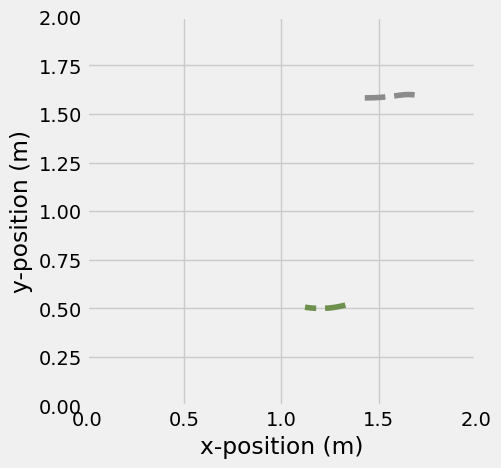

In [19]:
fig2, ax2 = plt.subplots()

ax2.set_xlim((0, 2))
ax2.set_ylim((0, 2))
ax2.set_xlabel('x-position (m)')
ax2.set_ylabel('y-position (m)')
ax2.set_aspect('equal', adjustable='box')

line, = ax2.plot([], [],'o-') # add marker at end points
line2, = ax2.plot([], [],'o-')
marker, = ax2.plot([], [], 'o', markersize=10)
#ax2.plot([X1[0,:], X2[0,:]], [X1[1,:], X2[1,:]], '--', label = 'path')
ax2.plot(X1[0,:],X1[1,:],'--', label = 'path x1')
ax2.plot(X2[0,:],X2[1,:],'--', label = 'path x2')

In [20]:
def animate2(i):
    '''function that updates the line data for the pendulum
    arguments:
    ----------
    i: index of timestep
    outputs:
    --------
    line: the line object plotted in the above ax.plot(...)
    '''
    line.set_data([X1[0, i]], [X1[1, i]])
    line2.set_data([X2[0, i]], [X2[1, i]])
    #marker.set_data([X1[0, i], X1[1,i]])
    #return (line, marker, )
    return (line, line2, ) 

In [21]:
def init2():
    line.set_data([], [])
    line2.set_data([], [])
    return (line,line2,)

In [23]:
anim2 = animation.FuncAnimation(fig2, animate2, init_func=init2,
                               frames=range(0,len(t)), interval=50, 
                               blit=True)

In [24]:
HTML(anim2.to_html5_video())

**(c)** Plot the angle $\theta$ for one period of oscillation for 2 conditions, label your two lines on one graph:

1. $a_x=$ 0 m/s$^2$

2. $a_x=$ 4 m/s$^2$

In [ ]:
 #your work here